In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')



In [ ]:
config['model']['num_epochs']

In [1]:
from pathlib import Path
import Augmentation
from AudioDataset import AudioDataset
import torchaudio
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import datasets
import numpy as np
from torch.utils.data import Dataset, DataLoader
import utils
import os
import transforms
import machineLearning
from model import ResNet18, CNNNetwork, M5
from configparser import ConfigParser
import matplotlib.pyplot as plt
from datetime import datetime
from audiomentations import  AddGaussianNoise, TimeStretch, PitchShift, Shift


if __name__ == '__main__':
    config = ConfigParser()
    config.read('config.ini')

    audio_paths = Augmentation.getAudioPaths('./data/')[0:1]

    transformList = [
        {
            "audio": [
                AddGaussianNoise(min_amplitude=0.001,
                                 max_amplitude=0.015,
                                 p=0.5),
                TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
                PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
                Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
            ],
            "spectrogram": []
        },
        {
            "audio": [],
            "spectrogram": [
                torchaudio.transforms.TimeMasking(80),
                torchaudio.transforms.FrequencyMasking(80)
            ],
        },
    ]

    audio_train_dataset = transforms.transformData(audio_paths,
                                                   transformList)
    train_dataloader = torch.utils.data.DataLoader(
        audio_train_dataset,
        batch_size=int(config['model']['batch_size']),
        num_workers=0,
        shuffle=True,)


c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\jianq/.cache\torch\hub\pytorch_vision_v0.10.0


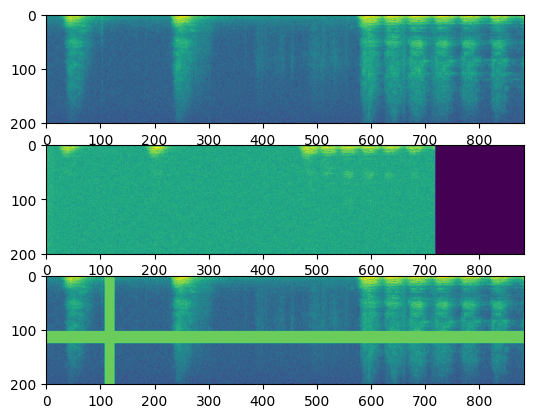

In [3]:
fig, axs = plt.subplots(len(audio_train_dataset))

for i, spectrogram in enumerate(audio_train_dataset):
    axs[i].imshow(spectrogram[0][0])

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

# Generate 2 seconds of dummy audio for the sake of example
samples = np.random.uniform(low=-0.2, high=0.2,
                            size=(32000, )).astype(np.float32)

# Augment/transform/perturb the audio data
augment(samples=samples, sample_rate=16000)